In [51]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso, LassoCV

# Standard OLS regression

                            OLS Regression Results                            
Dep. Variable:       Mean_Obesity_Pct   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     31.98
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           8.40e-07
Time:                        13:53:50   Log-Likelihood:                -124.88
No. Observations:                  50   AIC:                             253.8
Df Residuals:                      48   BIC:                             257.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4310      3.032      5.089      0.0

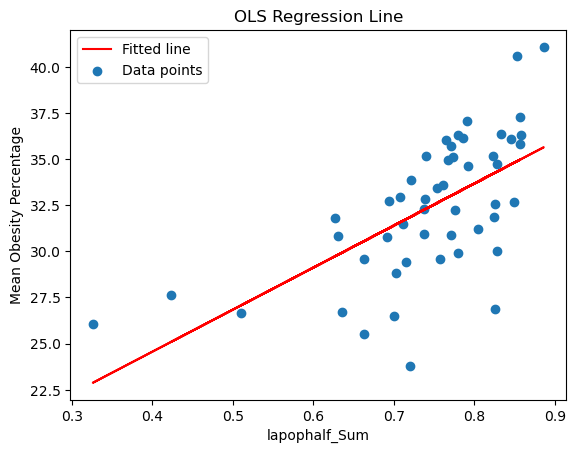

In [22]:
data = pd.read_csv('../data/data-state-for-processing/food_access_state_data_2019.csv')
obesity_data = pd.read_csv('../data/data-state-for-processing/obesity-state-2019-cleaned.csv')
x_var = "lapophalf_Sum"

# align by state
state_code_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DC':'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

obesity_data['LocationAbbr'] = obesity_data['LocationAbbr'].map(state_code_to_name)
merged_data = pd.merge(data, obesity_data, left_on='State', right_on='LocationAbbr')
# print(merged_data['State'])

X = np.divide(merged_data[x_var], merged_data["Pop2010_Sum"])  # Independent variable
# print(X)
Y = merged_data['Mean_Obesity_Pct']  # Dependent variable

# intercept term
X = sm.add_constant(X)

# fit ols
model = sm.OLS(Y, X).fit()

print(model.summary())


# Plot the data points
plt.scatter(np.divide(merged_data[x_var], merged_data["Pop2010_Sum"]), Y, label='Data points')

# Plot the regression line
plt.plot(np.divide(merged_data[x_var], merged_data["Pop2010_Sum"]), model.fittedvalues, color='red', label='Fitted line')

# Add labels and title
plt.xlabel(x_var)
plt.ylabel('Mean Obesity Percentage')
plt.title('OLS Regression Line')
plt.legend()

# Show the plot
plt.show()


# LASSO Regression

In [70]:
data = pd.read_csv('../data/data-state-for-processing/merged_dataset.csv')

x_variables = [
    "Urban_Percentage",
    "Total_Population",
    "Median_Family_Income",
    "Population_Half_Percent",
    "Low_Income_Half_Percent",
    "Vehicle_Half_Percent",
    "Population_1_Percent",
    "Low_Income_1_Percent",
    "Vehicle_1_Percent",
    "Mean_Fruit_Consump_Pct",
    "Mean_Veggie_Consump_Pct",
    "Convenience stores, 2016",
    "Farmers' markets, 2018",
    "Fast-food restaurants, 2016",
    "Grocery stores, 2016"
]

# Columns to normalize
columns_to_normalize = [
    "Convenience stores, 2016",
    "Farmers' markets, 2018",
    "Fast-food restaurants, 2016",
    "Grocery stores, 2016"
]

# Calculate the total number of stores for each row
data['Total_Stores'] = data[columns_to_normalize].sum(axis=1)

# Calculate the percentage for each type of store
data['Convenience_Percent'] = (data["Convenience stores, 2016"] / data['Total_Stores']) * 100
data['Farmers_Percent'] = (data["Farmers' markets, 2018"] / data['Total_Stores']) * 100
data['FastFood_Percent'] = (data["Fast-food restaurants, 2016"] / data['Total_Stores']) * 100
data['Grocery_Percent'] = (data["Grocery stores, 2016"] / data['Total_Stores']) * 100

# Drop the Total_Stores column if you don't need it anymore
data = data.drop(columns=['Total_Stores'])



In [69]:
data = pd.read_csv('../data/data-state-for-processing/merged_dataset.csv')

#    "Total_Population", 
x_variables = [
    "Urban_Percentage",
    "Median_Family_Income",
    "Population_Half_Percent",
    "Low_Income_Half_Percent",
    "Vehicle_Half_Percent",
    "Population_1_Percent",
    "Low_Income_1_Percent",
    "Vehicle_1_Percent",
    "Mean_Fruit_Consump_Pct",
    "Mean_Veggie_Consump_Pct",
    "Convenience stores, 2016",
    "Farmers' markets, 2018",
    "Fast-food restaurants, 2016",
    "Grocery stores, 2016"
]

# Columns to normalize
columns_to_normalize = [
    "Convenience stores, 2016",
    "Farmers' markets, 2018",
    "Fast-food restaurants, 2016",
    "Grocery stores, 2016"
]

# Calculate the total number of stores for each row
data['Total_Stores'] = data[columns_to_normalize].sum(axis=1)

# Calculate the percentage for each type of store
data['Convenience_Percent'] = (data["Convenience stores, 2016"] / data['Total_Stores']) * 100
data['Farmers_Percent'] = (data["Farmers' markets, 2018"] / data['Total_Stores']) * 100
data['FastFood_Percent'] = (data["Fast-food restaurants, 2016"] / data['Total_Stores']) * 100
data['Grocery_Percent'] = (data["Grocery stores, 2016"] / data['Total_Stores']) * 100

# Drop the Total_Stores column if you don't need it anymore
data = data.drop(columns=['Total_Stores'])


In [76]:
data = data.dropna(subset=x_variables)

X, y = data[x_variables], data["Mean_Obesity_Pct"]
# define model
model = Lasso(alpha=0.01)
model.fit(X, y)

# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # force scores to be positive
# scores = abs(scores)
# print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

# # cross validation to find the best alpha for the model
# model = LassoCV(cv=5, random_state=42)  # 5-fold cross-validation
# model.fit(X, y)

# alpha = model.alpha_
coefficients = model.coef_
intercept = model.intercept_

coef_df = pd.DataFrame({
    'Feature': x_variables,
    'Coefficient': coefficients
})

print(f'Best alpha: {alpha}')
print(coef_df)
print(f'Intercept: {intercept}')


Best alpha: 5173.641935290529
                        Feature   Coefficient
0              Urban_Percentage -3.159149e-02
1              Total_Population -9.225381e-07
2          Median_Family_Income -6.957738e-05
3       Population_Half_Percent  2.516146e-01
4       Low_Income_Half_Percent -3.013225e-02
5          Vehicle_Half_Percent  4.235730e+00
6          Population_1_Percent  2.332551e-02
7          Low_Income_1_Percent  0.000000e+00
8             Vehicle_1_Percent -3.887301e+00
9        Mean_Fruit_Consump_Pct  2.063641e-01
10      Mean_Veggie_Consump_Pct  4.458721e-01
11     Convenience stores, 2016 -1.341580e-04
12       Farmers' markets, 2018  5.742189e-03
13  Fast-food restaurants, 2016  1.144007e-03
14         Grocery stores, 2016  1.246099e-04
Intercept: -1.7867666719231607


/Users/azhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.644e+01, tolerance: 7.205e-02
  model = cd_fast.enet_coordinate_descent(


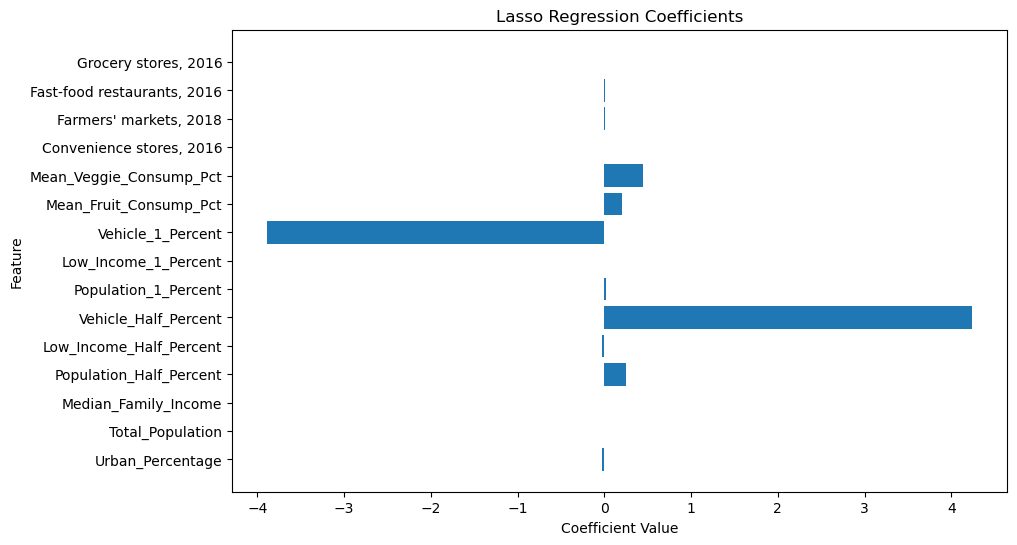

In [77]:
# plot results

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Lasso Regression Coefficients')
plt.show()